In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import cartopy
import xarray as xr
#import matplotlib.cm as cm
from utils import u_darrays
import matplotlib.patches as patches

%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [6]:
MREGIONS = {
 'GPlains_N' : [[-100,-90,32,47], 'nam', -6, (1,7), (8,12), (1,12), [-99,-96,42,44], 'GPlains', 'JJA'], # # 18
 'GPlains_S' : [[-100,-90,32,47], 'nam', -6, (1,7), (8,12), (1,12), [-98,-95,36,39], 'GPlains', 'JJA'], # # 18
 'china_W' : [[105,115,25,40], 'asia', 8 , (1,7), (8,12), (1,12), [105,107,29,31], 'china', 'JJA'], # 4
 'china_E' : [[105,115,25,40], 'asia', 8 , (1,7), (8,12), (1,12), [111,113,25,27], 'china', 'JJA'], # 4
 'india_N' : [[70,90, 5,30], 'asia', 5, (1,7), (8,12), (1,12), [74,76,24,26], 'india', 'JJA'], # 7
 'india_S' : [[70,90, 5,30], 'asia', 5, (1,7), (8,12), (1,12), [76,79,18,21], 'india', 'JJA'], # 7
 'WAf_N' : [[-18,25,4,25], 'spac', 0, (1,7), (8,12), (1,12), [-5,5,14,16], 'WAf', 'JJA'], # last is hourly offset to UCT # 12    # [-18,25,4,25]
 'WAf_S' : [[-18,25,4,25], 'spac', 0, (1,7), (8,12), (1,12), [-5,5,7,9], 'WAf', 'JJA'],
 'australia_S' : [[120,140,-27, -15], 'asia', 9, (10,12), (1,5), (1,12), [125,134, -21,-18], 'australia', 'DJF'], # 3
 'australia_N' : [[120,140,-27, -15], 'asia', 9, (10,12), (1,5), (1,12), [125,134, -17,-15], 'australia', 'DJF'],
 'SAf' : [[20,35, -35,-15], 'spac', 2, (9,12), (1,5), (1,12), [21,24.5,-28,-24], 'SAf', 'DJF'], # 10
 'sub_SA_S' : [[-68,-47, -40, -20.5], 'spac', -4, (9,12), (1,5), (1,12), [-63,-60,-33,-30], 'sub_SA', 'DJF'],  # 16
 'sub_SA_N' : [[-68,-47, -40, -20.5], 'spac', -4, (9,12), (1,5), (1,12), [-63,-60,-28,-22], 'sub_SA', 'DJF']  # 16
# 'trop_SA' : [[-75, -50, -20, -5], 'spac', -5, (1,12), (1,12), (1,12)], # 17

}
S_REGION = 'china_W'
REGION = MREGIONS[S_REGION][7]

In [8]:

def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None, clabel='', cmap='RdBu_r'):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')
    ax.coastlines()

    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'],width=0.0005, headwidth=7)
    
    
        ## additional contour on plot   
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='Turquoise', linewidths=0.5 )
        #plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label(clabel)

In [12]:
era5f_pl = xr.open_mfdataset('/media/ck/LStorage/global_water/ERA5_global_0.7/monthly/pressure_levels/*.nc')
era5f_pl = u_darrays.flip_lat(era5f_pl)

era_uh = era5f_pl['u'].sel(level=650).groupby('time.season').mean('time').load()
era_ul = era5f_pl['u'].sel(level=925).groupby('time.season').mean('time').load()
era_vh = era5f_pl['v'].sel(level=650).groupby('time.season').mean('time').load()
era_vl = era5f_pl['v'].sel(level=925).groupby('time.season').mean('time').load()
era_t = era5f_pl['t'].sel(level=925).groupby('time.season').mean('time').load()

era_ushear = era_uh-era_ul
era_vshear = era_vh-era_vl

NameError: name 'era_shear' is not defined

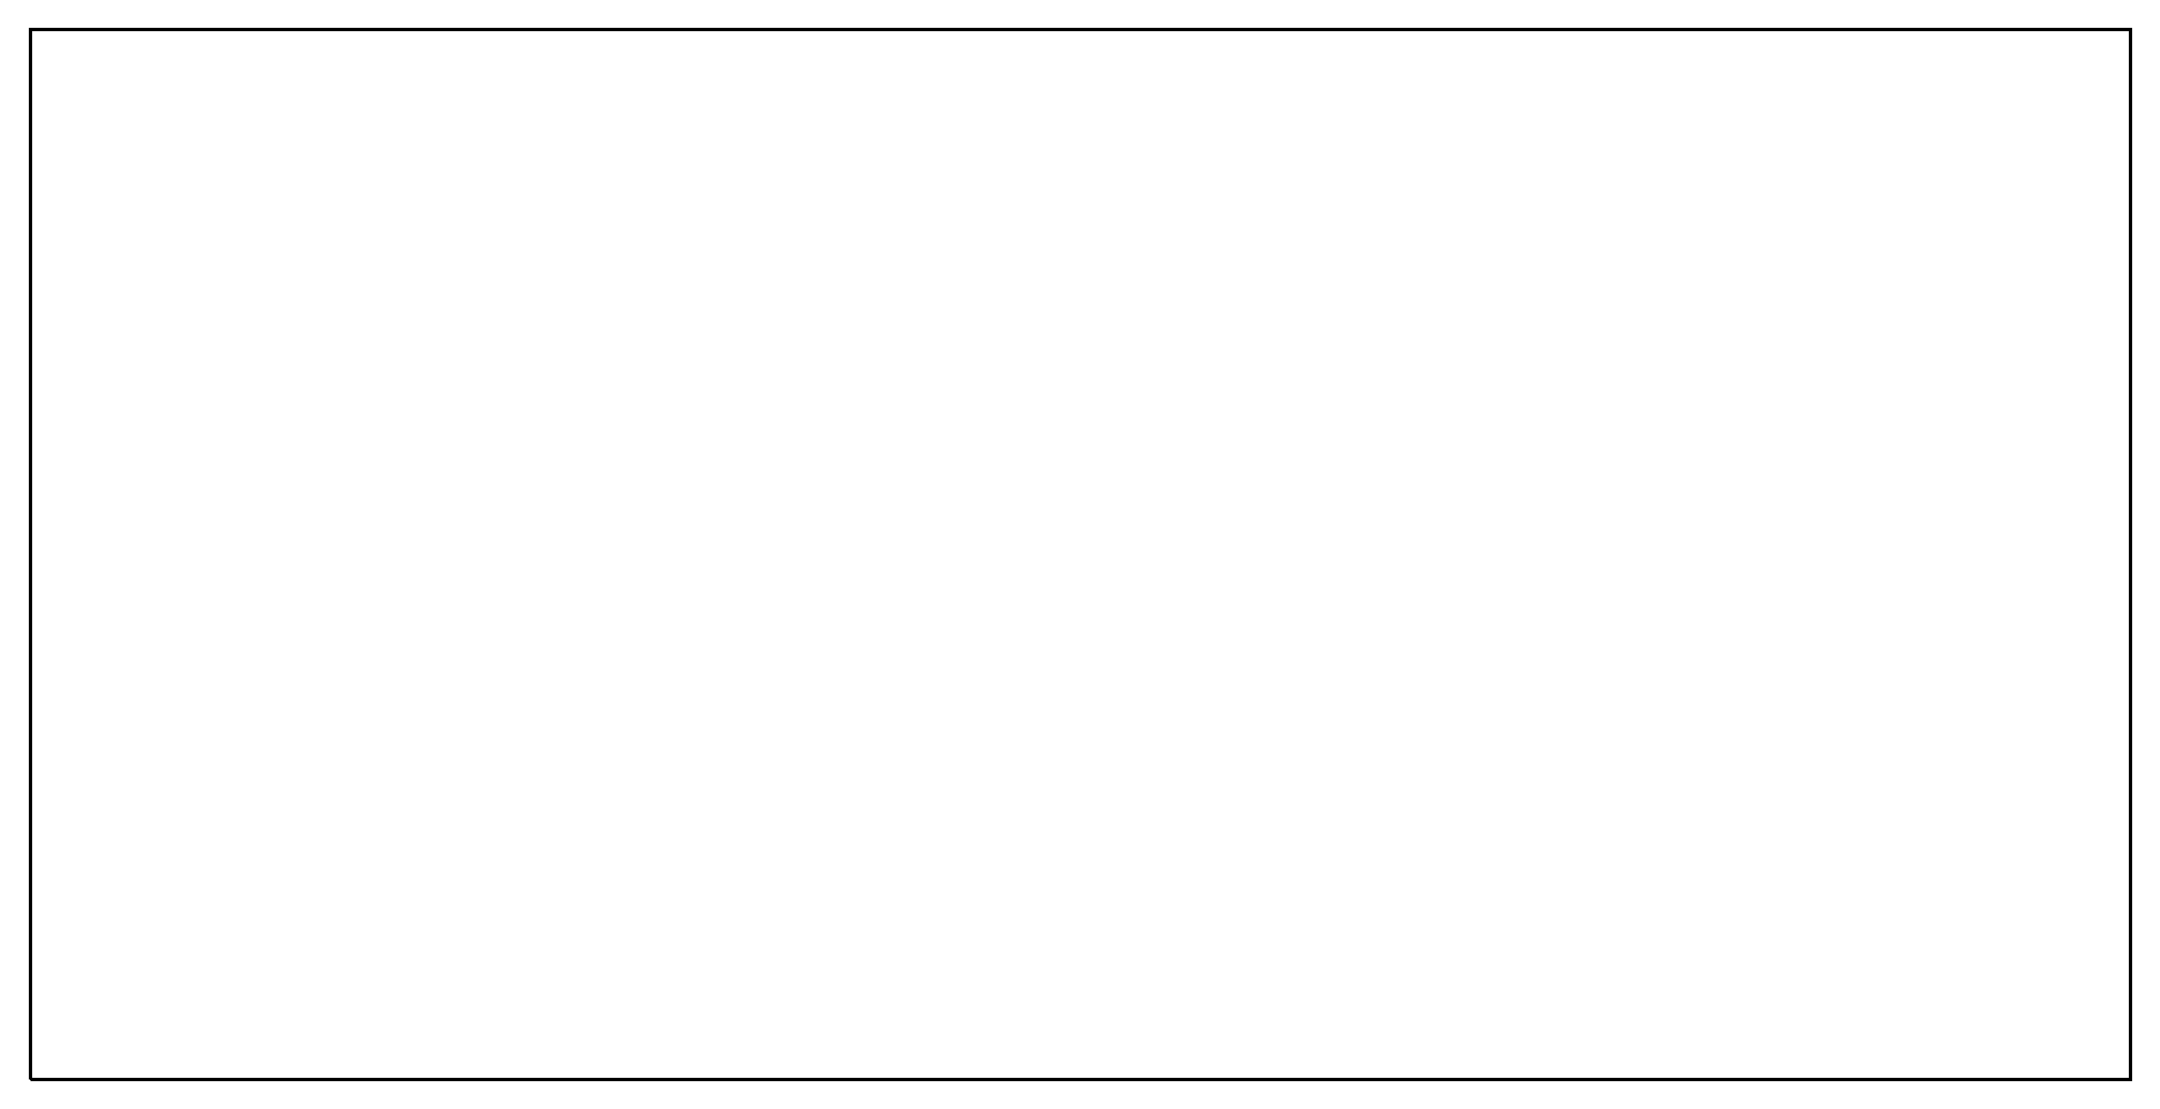

In [13]:
f = plt.figure(figsize=(20,10), dpi=300)


st=5
sarrow = 1
scale = 300
lon =era_t.longitude
lat = era_t.latitude
lon2d, lat2d = np.meshgrid(lon,lat)
xquiv = lon2d[sarrow::st, sarrow::st]
yquiv = lat2d[sarrow::st, sarrow::st]

mtag = 'DJF'
uu = era_ushear.sel(season=mtag)[sarrow::st, sarrow::st]
vv = era_vshear.sel(season=mtag)[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}

ax = f.add_subplot(221, projection=ccrs.PlateCarree())
draw_map(ax, era_t.sel(season=mtag)-273.15, era_shear.latitude, era_shear.longitude, title=mtag+' ERA5 t925 | 650-925hPa shear', levels=np.linspace(-30,30,20), clabel=r'degC', cmap='Spectral',  quiver=qin) #np.percentile(k, np.arange(5,91,11)
for reg in MREGIONS.keys():
    box = MREGIONS[reg][6]
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='turquoise', zorder=99, fill=False)
    ax.add_patch(rect2)
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='red', zorder=99, fill=False)
    ax.add_patch(rect1)


mtag = 'MAM'
uu = era_ushear.sel(season=mtag)[sarrow::st, sarrow::st]
vv = era_vshear.sel(season=mtag)[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}

ax = f.add_subplot(222, projection=ccrs.PlateCarree())
draw_map(ax, era_t.sel(season=mtag)-273.15, era_shear.latitude, era_shear.longitude, title=mtag+' ERA5 t925 | 650-925hPa shear', levels=np.linspace(-30,30,20), clabel=r'degC', cmap='Spectral',  quiver=qin) #np.percentile(k, np.arange(5,91,11)
for reg in MREGIONS.keys():
    box = MREGIONS[reg][6]
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='turquoise', zorder=99, fill=False)
    ax.add_patch(rect2)
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='red', zorder=99, fill=False)
    ax.add_patch(rect1)


mtag = 'JJA'
uu = era_ushear.sel(season=mtag)[sarrow::st, sarrow::st]
vv = era_vshear.sel(season=mtag)[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}

ax = f.add_subplot(223, projection=ccrs.PlateCarree())
draw_map(ax, era_t.sel(season=mtag)-273.15, era_shear.latitude, era_shear.longitude, title=mtag+' ERA5 t925 | 650-925hPa shear', levels=np.linspace(-30,30,20), clabel=r'degC', cmap='Spectral',  quiver=qin) #np.percentile(k, np.arange(5,91,11)
for reg in MREGIONS.keys():
    box = MREGIONS[reg][6]
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='turquoise', zorder=99, fill=False)
    ax.add_patch(rect2)
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='red', zorder=99, fill=False)
    ax.add_patch(rect1)

mtag = 'SON'
uu = era_ushear.sel(season=mtag)[sarrow::st, sarrow::st]
vv = era_vshear.sel(season=mtag)[sarrow::st, sarrow::st]
qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}


ax = f.add_subplot(224, projection=ccrs.PlateCarree())
draw_map(ax, era_t.sel(season=mtag)-273.15, era_shear.latitude, era_shear.longitude, title=mtag+' ERA5 t925 | 650-925hPa shear', levels=np.linspace(-30,30,20), clabel=r'degC', cmap='Spectral',  quiver=qin) #np.percentile(k, np.arange(5,91,11)
for reg in MREGIONS.keys():
    box = MREGIONS[reg][6]
    rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='turquoise', zorder=99, fill=False)
    ax.add_patch(rect2)
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='red', zorder=99, fill=False)
    ax.add_patch(rect1)

plt.tight_layout()
#f.savefig(cnst.FIGS+'/LMCS/ERA5_shear_profiles/profileBoxes_shear_overview.pdf')